In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.79298422,  0.57874604],
       [ 1.76538492,  0.1068111 ],
       [ 0.89040871,  1.82779174],
       ...,
       [-0.52605665,  1.34171655],
       [ 0.66755798,  1.05524768],
       [ 0.59513054,  0.67930779]])

In [5]:
y

array([  36.4356111 ,   60.75280501,   66.23525681,  -42.58226661,
        -35.13600622,    1.91293454,   36.22117649,  -16.78602099,
        -34.24190826,    7.79085877,  -67.29369987,   30.96340403,
        -10.03129939,    4.31252075,   38.79070348,  -57.79406268,
          4.58177702,   52.54580408,   -2.16559883,  -29.68537464,
         10.34119575,   22.56713459,  -40.46925361,  -28.50660886,
         10.72783322,  -11.0781727 ,  -15.47075092,    5.12223354,
        -40.39591478,   57.60786709,  -24.56437507,   57.7031112 ,
          7.17085048,   15.48291783,    7.95702243,    2.48522862,
         46.89576091,   74.56890127,   16.37671595,   22.69542823,
         24.49918803,  -15.01852801,   18.55208341,   11.20894577,
         -2.23825604,  -39.94710543,   -7.93313051,   46.88562906,
        -15.40294687,    0.61607523,    4.72650074,  -33.55572692,
        -21.45620946,   -3.6995032 ,   -3.59150144,  -11.13799485,
         13.99845359,   34.70585044,   27.25485952,  -42.20468

In [6]:
pd.DataFrame(X)[0]

0      0.792984
1      1.765385
2      0.890409
3     -0.551855
4     -1.456965
         ...   
995   -0.366474
996    0.128240
997   -0.526057
998    0.667558
999    0.595131
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

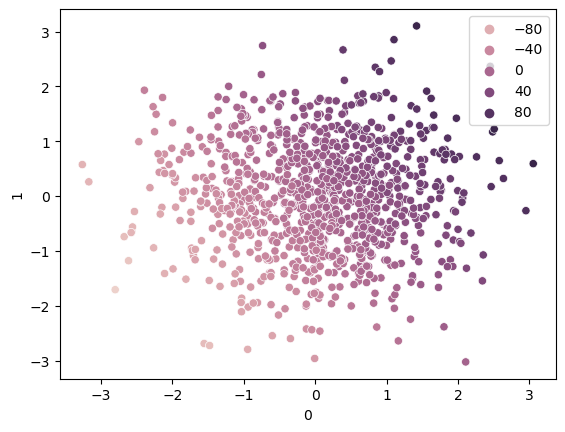

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[30.36344556, 19.10620804]])

In [14]:
y_pred=svr.predict(X_test)

In [15]:
y_pred


array([-3.38672667e+01, -9.69094065e+00,  4.26153909e+01, -9.09051854e+01,
        2.77703633e+01,  5.28895624e+01, -4.57437222e+01,  8.14398423e+00,
        3.26434645e+01,  3.93091239e+01,  4.15757201e+00, -2.34800264e+01,
       -6.30800643e+00,  1.26473020e+01, -4.43425066e+01, -1.06323080e+01,
        4.94815900e+00,  3.99460689e+00, -2.47459371e+00,  1.80039794e+01,
        5.39976234e+01,  2.23694588e+01,  4.17354679e+01, -3.13757935e+01,
        5.27113309e+00,  1.05952614e+01,  4.80342752e+01, -1.29122284e+01,
       -2.03314617e+01,  1.00939700e+01,  1.64224654e+01,  3.72107798e+01,
       -3.88025010e+01, -4.58120458e+01,  3.49760555e+01,  1.56571676e+01,
       -9.45895108e+00,  4.91236948e+01,  3.11606540e+01,  6.31644072e+00,
        2.37170789e+01, -4.01679148e+01,  7.17157175e+00,  5.46827998e+00,
       -6.15578711e+01,  4.76449106e+01,  1.00681013e+01,  7.87767116e+01,
       -2.35530071e+00, -4.15722945e+01,  5.69545462e+00,  4.65161567e+00,
        6.41770673e+00,  

In [16]:
## Hyprparameter tuning

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear'],'epsilon':[0.1,0.2,0.3]}


In [22]:
grid=GridSearchCV(SVR(),param_grid=param_grid,scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [23]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-19.414 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-19.151 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-13.513 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-16.182 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-18.316 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-19.414 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-19.151 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-13.513 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-16.182 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-18.316 total time=   0.0s
[CV 1/5] END C=0.1

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [24]:
grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [30]:
from sklearn.metrics import r2_score
y_pred=grid.predict(X_test)
print(r2_score(y_test,y_pred))

0.992877119769932
